# Week03 

The goals for week03 are to use the maximum likelihood approach to estimate parameters for a model and to characterize the variability in parameters using the Fisher information.  

We will learn
- The Fisher Information for one and N data points
- The Fundemental Theorum of Maximum Likelihood
- How to compute Confidence Intervals for parameters

### Model setup
Suppose we have a data vector that contains $N$ datapoints

\begin{align}
    x = [x_{1},x_{2},\cdots,x_{N}]
\end{align}

We will assume each data point $x_{i}$ was generated from a corresponding random variable $X_{i}$, or 

\begin{align}
    X_{i} \sim x_{i} \text{ for } i=1 \text{ to } N
\end{align}

To model our data, we can further assume our random variables $X_{i}$ are **independent and identically distributed**

### iid
We will assume every pair of random variables are *indepednent*, that is,

\begin{align}
    p(X_{i} | X_{j} = x) = p(X_{i})
\end{align}

We also further assume that every random variable $X_{i}$ follows the same distribution with the same parameters.
This is the identical distribution assumption and we often say " random variables $X_{1},X_{2}, \cdots X_{n}$ are identically distributed" or that

\begin{align}
    X_{i} \sim f(x|\theta)
\end{align}

where $f$ is a probability density (or mass) function and $\theta$ is a set of corresponding parameters. Here, each random variable follows the *same* probability density/mass function with the *same* set of parameters.

With these assumptions we were able to simplify our the likelihood and so loglikelihood.
Our likelihood $\mathcal{L}$ simplified to

\begin{align}
    \mathcal{L} \left(\theta \right) &= p(x_{1},x_{2},x_{3},\cdots,x_{n} | \theta) \\ 
                                     &= p(x_{1} | \theta )p(x_{2} | \theta )p(x_{3} | \theta ) \cdots p(x_{n} | \theta ) = \prod_{i=1}^{n} p(x_{i}|\theta) & \text{Independence} \\ 
&= \prod_{i=1}^{n} f(x_{i}|\theta) & \text{identically distributed}
\end{align}

and so our logliklihood was 

\begin{align}
\ell \ell (\theta) = \log[ \mathcal{L} (\theta) ] =  \sum_{i=1}^{n} \log[ f(x_{i}|\theta)] 
\end{align}

We can maximize the above function for our parameters $\theta$.
For example, if we assumed each random variable was Poisson distributed then the probabilityi mass function is 

\begin{align}
    P(X=x) = f(x) = \dfrac{e^{-\lambda} \lambda^{x}}{x!}
\end{align}

and then the loglikelihood is 

\begin{align}
    \ell \ell (\theta) &= \sum_{i=1}^{n} \log[ \dfrac{e^{-\lambda} \lambda^{x_{i}}}{x_{i}!}]  \\ 
    &= \sum_{i=1}^{n} \log \left( e^{-\lambda} \lambda^{x_{i}} \right) - \log \left( x_{i}! \right)  \\ 
    &= \sum_{i=1}^{n} \log \left( e^{-\lambda} \right) + \log \left(\lambda^{x_{i}} \right) - \log \left( x_{i}! \right)  \\ 
    &= \sum_{i=1}^{n} -\lambda+ x_{i}\log \left(\lambda \right) - \log \left( x_{i}! \right)  \\  
\end{align}

Maximizing this function would return the maximum likelihood estimator for $\lambda$ or $\hat\lambda$.
But $\hat \lambda$, and any other maximum likelihood esitmate, depends on our data. 
If we samples a different set of $n$ data points then we would find a different $\hat \lambda$. 

Last week's notes showed a histogram of MLEs that looked suspicously "Normal"

### Fundemental Theorum of Maximum likelihood estimates

The FTML says that the maximum likelihood esitmate is centered over the true parameter value (lets say $\lambda)$ and normally distributed 

\begin{align}
    \lambda \sim \mathcal{N}\left( \hat \lambda, \mathcal{I}^{-1}/N \right)
\end{align}

where $\mathcal{I}$ is the **Fisher Information** a function of the model's parameters that helps describe how they vary for repeated samples.
It is often convienant to make clear that $\mathcal{I}$ is the Fisher information for a single data point $\mathcal{I}_{1}$ and to further define the Fisher information for $N$ data points as $\mathcal{I}_{N} = N\mathcal{I}$.

We can rewrite the FTML using $\mathcal{I}_{N}$ as 

\begin{align}
    \lambda \sim \mathcal{N}\left( \hat \lambda, \mathcal{I}_{N}^{-1} \right)
\end{align}

For example, for the Poisson model above the Fisher Information is

\begin{align}
    \mathcal{I}_{1} = \dfrac{1}{\lambda}
\end{align}

This means the Fisher information for $N$ data points is $N\mathcal{I}$ or 

\begin{align}
    \mathcal{I}_{N} = N\mathcal{I}_{1} = \dfrac{N}{\lambda}
\end{align}

However, we have a bit of a problem with the the Fisher information for $N$ datapoints.
The $\mathcal{I}_{N}$ involves the **true** parameter value $\lambda$. 
We will need to estimate $\mathcal{I}_{N}$ and we can do that by replacing $\lambda$ with our estimate of $\lambda$ that we call $\hat \lambda$. 
The mle of $\mathcal{I}_{N}$ is then $\dfrac{N}{\hat \lambda}$.
Note the small chance in notation but **big** change in meaning. We cannot compute the true Fisher information because we do not know the true parameter value $\lambda$. We can only estimate $\mathcal{I}_{N}$.


The MLE for the Poisson model, the value that maximizes the loglikelihood above, can be found analytically

\begin{align}
    \hat \lambda = \dfrac{\sum_{i=1}^{N} {x_{i}}}{N}
\end{align}

This means (finally) that we can chaarcterize the variability in our estimate or best guess for what the true $\lambda$ is: 

\begin{align}
    \lambda \sim \mathcal{N}\left( \dfrac{\sum_{i=1}^{N} {x_{i}}}{N} , \left[ \dfrac{N}{\hat \lambda} \right]^{-1}  \right)\\
    \lambda \sim \mathcal{N}\left( \dfrac{\sum_{i=1}^{N} {x_{i}}}{N} , \dfrac{\hat \lambda}{N} \right)\\
    \lambda \sim \mathcal{N}\left( \dfrac{\sum_{i=1}^{N} {x_{i}}}{N} , \dfrac{ \frac{1}{N} \sum_{i=1}^{N}x_{i} }{N} \right)\\
    \lambda \sim \mathcal{N}\left( \dfrac{\sum_{i=1}^{N} {x_{i}}}{N} , \dfrac{\sum_{i=1}^{N}x_{i} }{N^{2}} \right)\\
\end{align}

Lets put this theory to work. 

Suppose we collect the following data:

$x = [38,96,24,90,60]$

and further we assume these datapoints were generated from the same Poisson distribution with parameter $\lambda$.
Then we can say something about the probability of the **true,exact** $\lambda$.

\begin{align}
    \lambda \sim \mathcal{N}\left( \dfrac{\sum_{i=1}^{N} {x_{i}}}{N} , \dfrac{\sum_{i=1}^{N}x_{i} }{N^{2}} \right)
\end{align}

We can compute the sum of all xs
\begin{align}
    \sum_{i=1}^{N} {x_{i}} = 38+96+24+90+60 = 308
\end{align}

and we know that $N=5$ and so 

\begin{align}
    \lambda \sim \mathcal{N}\left( 308/5 , 308/25 \right) \\ 
    \lambda \sim \mathcal{N}\left( 61.6 , 12.32 \right) \\ 
\end{align}

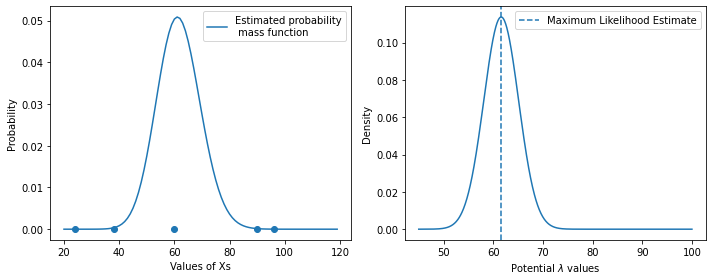

In [31]:
import scipy

data = [38,96,24,90,60]
N = len(data)

fig,axs = plt.subplots(1,2)

ax=axs[0]
ax.scatter(data,[0]*N)

domain = np.arange(20,120)
probs = scipy.stats.poisson(61.6).pmf(domain) # most likely lambda

ax.plot(domain,probs,label="Estimated probability\n mass function")
ax.set_xlabel("Values of Xs")
ax.set_ylabel("Probability")


ax.legend(loc="upper right")

ax = axs[1]

domain = np.linspace(45,100,10**3)
model = scipy.stats.norm(61.6, np.sqrt(12.32) )

ax.plot(domain,model.pdf(domain))

ax.axvline(61.6,label="Maximum Likelihood Estimate",linestyle="--")

ax.legend()

ax.set_xlabel(r"Potential $\lambda$ values")
ax.set_ylabel("Density")

fig.set_size_inches(10,4)
fig.set_tight_layout(True)